## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Iris

It is the normal iris dataset.

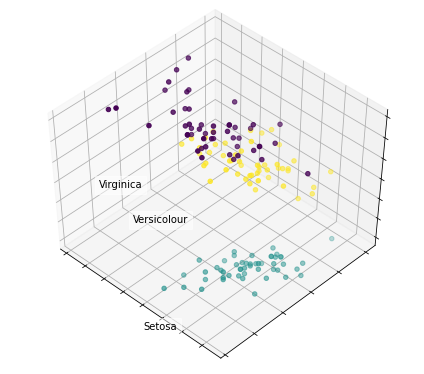

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [0]:
from sklearn.model_selection import train_test_split

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

### Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

In [4]:
from sklearn.tree import DecisionTreeClassifier

train_score = []
test_score = []

# Decision trees with depth = X
max_depth = 11
for x in range(2, max_depth):
  dtc = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=x, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
  dtc.fit(X_train, y_train)
  train_score.append(dtc.score(X_train, y_train))
  test_score.append(dtc.score(X_test, y_test))

depth = 1
for tr, te in zip(train_score, test_score):
  depth += 1
  print('Depth: ', str(depth))
  print('Training accuracy: ', tr)
  print('Testing accuarcy: ', te)


Depth:  2
Training accuracy:  0.9714285714285714
Testing accuarcy:  0.8888888888888888
Depth:  3
Training accuracy:  0.9809523809523809
Testing accuarcy:  0.9777777777777777
Depth:  4
Training accuracy:  0.9904761904761905
Testing accuarcy:  0.8888888888888888
Depth:  5
Training accuracy:  1.0
Testing accuarcy:  0.9333333333333333
Depth:  6
Training accuracy:  1.0
Testing accuarcy:  0.9333333333333333
Depth:  7
Training accuracy:  1.0
Testing accuarcy:  0.9333333333333333
Depth:  8
Training accuracy:  1.0
Testing accuarcy:  0.9333333333333333
Depth:  9
Training accuracy:  1.0
Testing accuarcy:  0.9333333333333333
Depth:  10
Training accuracy:  1.0
Testing accuarcy:  0.9333333333333333


### Question #2:

Predict the testing data. What is your accuracy_score?

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Choose the best hyperparameter max_depth is 3
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Question #3:

Try to use PCA to reduce the dimensionality to 2. Use the entire iris dataset. (DO NOT use training/testing data.) Plot 2-d figure with PCA data and their labels.

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

<Figure size 432x288 with 0 Axes>

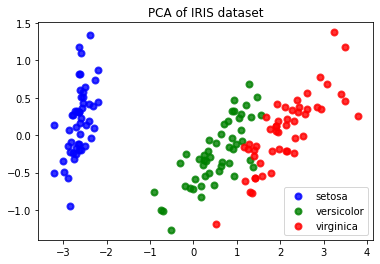

<Figure size 432x288 with 0 Axes>

In [7]:
# Plotting the results of PCA

labels = iris.target_names
colors = ['blue', 'green', 'red']
lw = 2
for color, i, label in zip(colors, [0, 1, 2], labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, 
                lw=lw, label=label)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.figure()

### Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result? 

In [8]:
# Test-train split and apply PCA

# Train, test splits
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)
# Decision trees with depth = X
# Depth = 3
pca_dtc = DecisionTreeClassifier(max_depth=3)
pca_dtc.fit(X_train_pc, y_train_pc)

print('Accuracy: ', accuracy_score(y_test_pc, pca_dtc.predict(X_test_pc)))

Accuracy:  0.9111111111111111


### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination.  

No, the accuracy is not higer. Because of the dimensions of iris dataset is only 4 which is not much higer dimension. So there's no benefit that we use PCA to iris dataset for down dimension size and maybe lose some information about iris dataset.

### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

Hint: PCA parameters, data preprocessing and feature engineering.

In [9]:
# Simple way is that we can use feature importance of decison tree,
# in order to choose useful features

print('feature importance:', dtc.feature_importances_)
print('Choose last 2 features')
fi_dtc = DecisionTreeClassifier(max_depth=3)
fi_dtc.fit(X_train[:,2:4], y_train)
print('After choose higher feature importance: ', 
      accuracy_score(y_test, fi_dtc.predict(X_test[:,2:4])))

feature importance: [0.       0.       0.041423 0.958577]
Choose last 2 features
After choose higher feature importance:  0.9777777777777777


## MNIST

Let's look at a famous handwritten numbers dataset.

In [0]:
digits = datasets.load_digits()
digi_X = digits.data
digi_y = digits.target

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

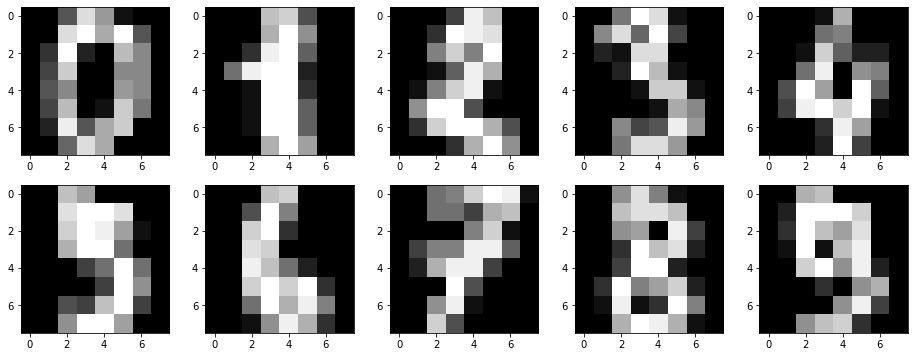

In [11]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i,:].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

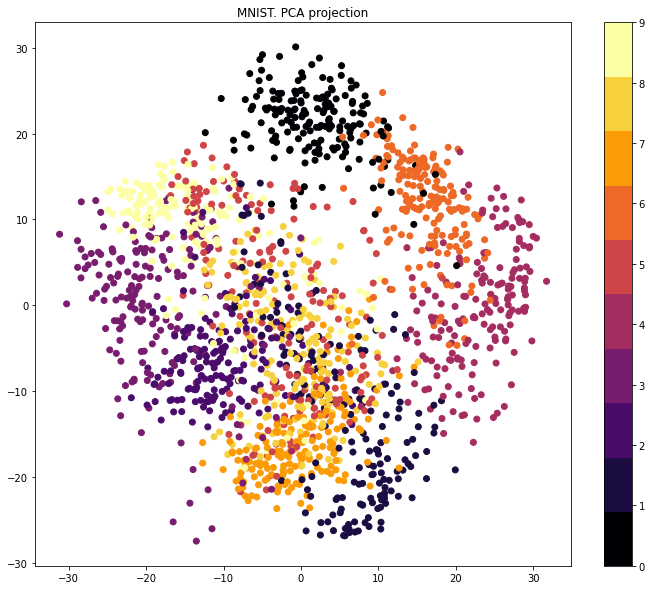

In [12]:
# Try plt.scatter and 'c' parameter
# Try plt.colorbar()
digi_pca = decomposition.PCA(n_components=2)
digi_pca.fit(digi_X)
digi_X_pca = digi_pca.transform(digi_X)

plt.figure(figsize= (12, 10))
cmap = plt.get_cmap('inferno', 10)
plt.scatter(digi_X_pca[:, 0], digi_X_pca[:, 1], c = digi_y, cmap = cmap)
plt.colorbar()
plt.title('MNIST. PCA projection')
plt.show()

### Question #8:

Why the figure looks bad? How many components would be better?

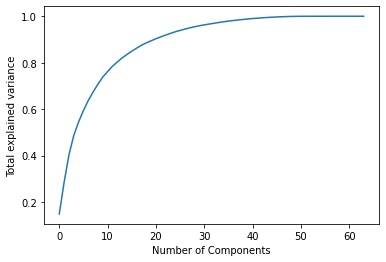

In [13]:
# hint: take a look at pca.explained_variance_ratio_
digi_pca = decomposition.PCA(n_components=digi_X.shape[1])
digi_pca.fit(digi_X)

plt.figure()
plt.plot(np.cumsum(digi_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total explained variance')
plt.show()

In [14]:
sorted(digi_pca.explained_variance_ratio_, reverse=True)
# we can choose >0.01 principal component

[0.14890593584063866,
 0.13618771239635474,
 0.11794593763975776,
 0.08409979421009192,
 0.05782414664005522,
 0.04916910317123993,
 0.043159870108257864,
 0.036613725770840495,
 0.033532480979671264,
 0.030788062089045422,
 0.023723408440031055,
 0.02272696568809563,
 0.018218633129951946,
 0.017738549371819116,
 0.014671010927893038,
 0.014097156016087029,
 0.013185892007274241,
 0.01248137817825554,
 0.010177179603215673,
 0.009056174389949885,
 0.00889538460519486,
 0.007971231565335721,
 0.007674932545637222,
 0.007229035693266989,
 0.00695888850900979,
 0.005960814580386098,
 0.00575614688340049,
 0.005151575817493728,
 0.004895397766908165,
 0.004288879680557608,
 0.0037360604832562348,
 0.0035327422344969607,
 0.003366839855390747,
 0.003280298505276732,
 0.0030832088410218277,
 0.0029377862855699205,
 0.002565886088562694,
 0.002277423974330648,
 0.0022227792211343073,
 0.0021143039263863306,
 0.0018990906184110886,
 0.0015865290661707463,
 0.0015115993446663065,
 0.0014057876

### Bonus #1:

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE

## Hierarchical Clustering

Here is an example of Hierarchical Clustering.

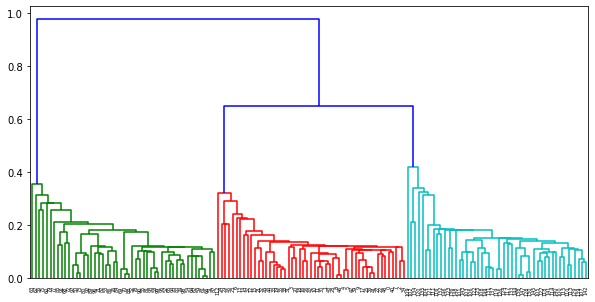

In [16]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

h_X = np.zeros((150, 2))

np.random.seed(seed=42)
h_X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
h_X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

h_X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
h_X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

h_X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
h_X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(h_X) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question #9:

Try to cluster iris data using the above codes. Show misclustered data points.

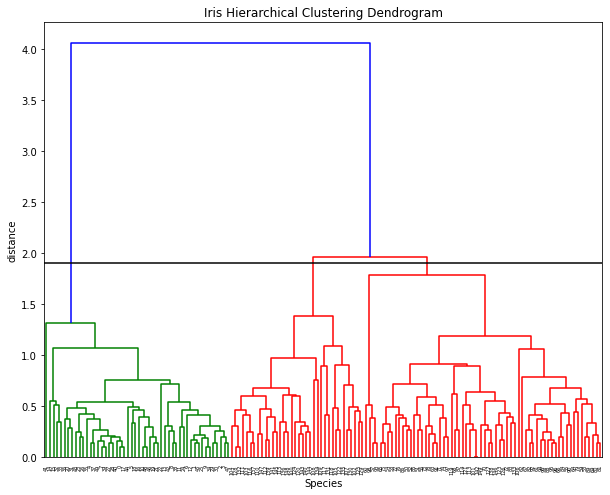

In [17]:
hc = hierarchy.linkage(X, 'average')
plt.figure(figsize=(10,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
hierarchy.dendrogram(hc,truncate_mode='lastp', p=150,leaf_rotation=90.)
plt.axhline(y=1.9, c='k')
plt.show()

In [18]:
# Cutting height=1.9 we can get 3 class
cutree = hierarchy.cut_tree(hc, height=1.9)
cutree = cutree.flatten()
misscluster_i = np.where((cutree == y) == False)
misscluster_i

(array([101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146,
        149]),)

In [19]:
y[misscluster_i]
# all of missclustered data is category 2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])